In [18]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
def create_image_and_label(nx,ny):
    r_min = 5
    r_max = 50
    border = 92
    sigma = 20
    cnt = 10
    
    image = np.ones((ny, nx))
    label = np.ones((ny, nx))
    mask = np.zeros((nx,ny), dtype=np.bool)
    for _ in range(cnt):
        a = np.random.randint(border, nx-border)
        b = np.random.randint(border, ny-border)
        r = np.random.randint(r_min, r_max)
        h = np.random.randint(1,255)

        y,x = np.ogrid[-a:ny-a, -b:nx-b]
        m = x*x + y*y <= r*r
        mask = np.logical_or(mask, m)

        image[m] = h
    label[mask] = 0
    
    image += np.random.normal(scale=sigma, size=image.shape)
    image -= np.amin(image)
    image /= np.amax(image)
    
    return image, label

<matplotlib.colorbar.Colorbar instance at 0x10c5946c8>

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


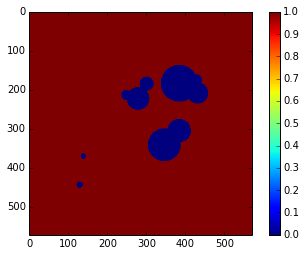

In [3]:
plt.imshow(create_image_and_label(572,572)[1])
plt.colorbar()

In [9]:
nx, ny =  572, 572

In [10]:
from tf_unet import image_gen

In [11]:
generator = image_gen.get_image_gen(nx, ny)

In [14]:
batch_x, batch_y = generator(4)

In [15]:
batch_x.shape

(4, 572, 572, 1)

In [16]:
from tf_unet import util
reload(util)

<module 'tf_unet.util' from 'tf_unet/util.pyc'>

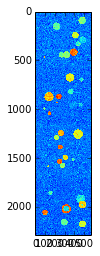

In [20]:
plt.imshow(batch_x.reshape(-1, 572))

In [135]:
img = np.concatenate((util.to_rgb(batch_x[0, 92:-92, 92:-92]), 
                      util.to_rgb(batch_y[0, ..., 1])), axis=1)

In [136]:
img.shape

(388, 776, 3)

In [137]:
util.to_rgb(batch_x[0, 92:-92, 92:-92]).shape

(388, 388, 3)

In [21]:
img = batch_x.reshape(-1, 572)

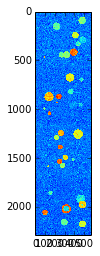

In [22]:
plt.imshow(img)

In [48]:
def to_rgb(img):
    img[np.isnan(img)] = 0
    img -= np.amin(img)
    img /= np.amax(img)
    blue = np.clip(4*(0.75-img), 0, 1)
    red  = np.clip(4*(img-0.25), 0, 1)
    green= np.clip(44*np.fabs(img-0.5)-1., 0, 1)
    rgb = np.stack((red, green, blue), axis=2)
    rgb *= 255
    return rgb.round().astype(np.uint8)

In [49]:
img_rgb = to_rgb(img)

In [50]:
from PIL import Image

In [52]:
Image.fromarray(img_rgb).save("test.png")

In [53]:
reload(image_gen)

<module 'tf_unet.image_gen' from 'tf_unet/image_gen.py'>

In [54]:
generator = image_gen.get_image_gen_rgb(nx, ny)

In [55]:
batch_x, batch_y = generator(4)

In [56]:
batch_x.shape

(4, 572, 3, 572, 1)

In [4]:
prediction = np.loadtxt("prediction.txt")

In [5]:
prediction.shape

(2128, 532)

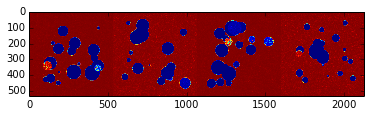

In [8]:
plt.imshow(prediction.T)

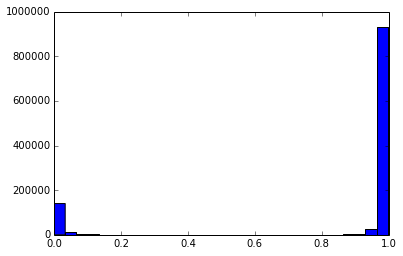

In [14]:
_=plt.hist(prediction.flatten(), 30)

In [15]:
pred = np.zeros_like(prediction)
pred[prediction>0.9] = 1

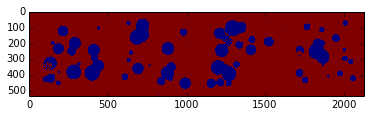

In [17]:
plt.imshow(pred.T)